# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Conclusion](#7)
8. [References](8)

<a id="1"></a> 
# **Introduction**

La modelación de series de tiempo es una técnica fundamental en el ámbito del pronóstico de ventas, y resulta particularmente relevante al aplicarse al pronóstico de las ventas de las tiendas de Walmart. Walmart es una de las cadenas minoristas más grandes y reconocidas a nivel mundial, con una amplia variedad de productos y una presencia significativa en múltiples regiones geográficas.

El pronóstico preciso de las ventas de las tiendas de Walmart es esencial para la planificación y la toma de decisiones tanto a nivel operativo como estratégico. La modelación de series de tiempo permite analizar y predecir los patrones y tendencias que se observan en los datos históricos de ventas, lo que ayuda a identificar los factores clave que influyen en el rendimiento de las tiendas y a tomar decisiones informadas sobre la gestión de inventario, la asignación de recursos y la estrategia de precios.

Al modelar las series de tiempo de las ventas de las tiendas de Walmart, se consideran diversos factores, como la estacionalidad, las tendencias a largo plazo, los efectos promocionales y otros factores externos que pueden afectar las ventas, como días festivos o eventos especiales. Estos factores pueden ser capturados por modelos de series de tiempo, como los modelos de promedio móvil (MA), los modelos autorregresivos (AR), los modelos de promedio móvil autorregresivo (ARMA) o los modelos autorregresivos integrados de promedio móvil (ARIMA), entre otros.

Además, los avances en el campo de la modelación de series de tiempo han dado lugar a enfoques más sofisticados, como los modelos de series temporales estacionales (SARIMA), los modelos de regresión con series de tiempo (ARIMAX) y los modelos de redes neuronales recurrentes (RNN), que pueden capturar relaciones más complejas y patrones no lineales en los datos de ventas.

En resumen, la modelación de series de tiempo aplicada al pronóstico de las ventas de las tiendas de Walmart es una herramienta valiosa para comprender y predecir el rendimiento de las tiendas en función de los patrones históricos. Esto permite a Walmart optimizar su planificación, tomar decisiones estratégicas y mejorar su eficiencia operativa en el competitivo mundo minorista.

<a id="2"></a>
# **Case study**

En este estudio de caso, exploraremos cómo la modelación de series de tiempo puede aplicarse al pronóstico de las ventas de las tiendas de Walmart. Walmart es una cadena minorista líder a nivel mundial, con una amplia red de tiendas y una gran variedad de productos. El pronóstico preciso de las ventas es fundamental para Walmart, ya que les permite planificar sus operaciones, gestionar el inventario de manera eficiente y tomar decisiones estratégicas para maximizar los ingresos.

Para llevar a cabo este estudio de caso, utilizaremos un conjunto de datos históricos de ventas de varias tiendas de Walmart. Los datos incluyen información sobre las ventas diarias, así como otros posibles factores que pueden influir en las ventas, como promociones especiales, días festivos y eventos locales. El objetivo es utilizar estos datos para construir un modelo de series de tiempo que pueda predecir las ventas futuras de las tiendas de Walmart.

We will use different techniques for analysis and forecasting:

1. Data collection.
2. Exploratory data analysis.
3. Data preparation.
4. Model selection.
5. Model adjustment and evaluation.
6. Sales Forecast.

En base al análisis de las series de tiempo de las ventas de las tiendas de Walmart y la construcción de modelos adecuados, podemos obtener pronósticos precisos que ayuden a Walmart a tomar decisiones informadas y estratégicas en términos de gestión de inventario, planificación de recursos y estrategias de ventas. La modelación de series de tiempo proporciona una herramienta poderosa para comprender y predecir las fluctuaciones en las ventas, así como para identificar patrones estacionales y tendencias a largo plazo que pueden influir en el rendimiento de las tiendas de Walmart.

## **Load Library**

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5


# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

## **About Dataset**
Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in nearby Rogers, Arkansas in 1962 and incorporated under Delaware General Corporation Law on October 31, 1969. It also owns and operates Sam's Club retail warehouses. In India, Walmart operates under the name of Flipkart Wholesale. 

The **file** has information about the Weekly Sales of 45 stores for the year 2010-2012 including the factors affectors affecting Sales such as Holidays, Temperature, Fuel Price, CPI, and Unemploym.

- 1- Store: Store Numbers ranging from 1 to 45
- 2- Date: The Week of Sales. It is in the format of dd-mm-yyyy. The date starts from 05-02-2010
- 3- Weekly_Sales: The sales of the given store in the given week
- 4- Holiday_Flag: If the week has a special Holiday or not. 1-The week has a Holiday 0-Fully working week 
- 5- TemperatureAverage: Temperature of the week of sales
- 6- Fuel_Price: Price of the Fuel in the region of the given store
- 7- Unemployment: Unemployment **rate** of the given store region
- 8- CPI: Customer Price Index , the instrument to measure inflation. It is used to estimate the average variation between two given periods in the prices of products consumed by households. It is a composite measurement of trends in the prices of products, at constant quality.

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/walmart-sales-dataset-of-stores.csv",parse_dates=["Date"] )
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
# Converting Date to datetime
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")

The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [5]:
df=df.rename(columns={"Date": "ds", "Weekly_Sales": "y"})
df.head()

,Store,ds,y,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   ds            6435 non-null   datetime64[ns]
 2   y             6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


# **Explore Data with the plot method** <a class="anchor" id="3"></a>

### **Trend Analysis for all 45 stores**

*To analyze trends it's crucial to keep in mind the main factors that will possibly affect the behaviour of sales*

**Holiday Events in the Week**

    Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
    Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
    Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12
    Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

In [7]:
date_sales = df.groupby("ds")[["y"]].sum().reset_index()
date_sales["unique_id"]="1"
date_sales

,ds,y,unique_id
0,2010-02-05,49750740.50,1
1,2010-02-12,48336677.63,1
2,2010-02-19,48276993.78,1
3,2010-02-26,43968571.13,1
4,2010-03-05,46871470.30,1
...,...,...,...
138,2012-09-28,43734899.40,1
139,2012-10-05,47566639.31,1
140,2012-10-12,46128514.25,1
141,2012-10-19,45122410.57,1


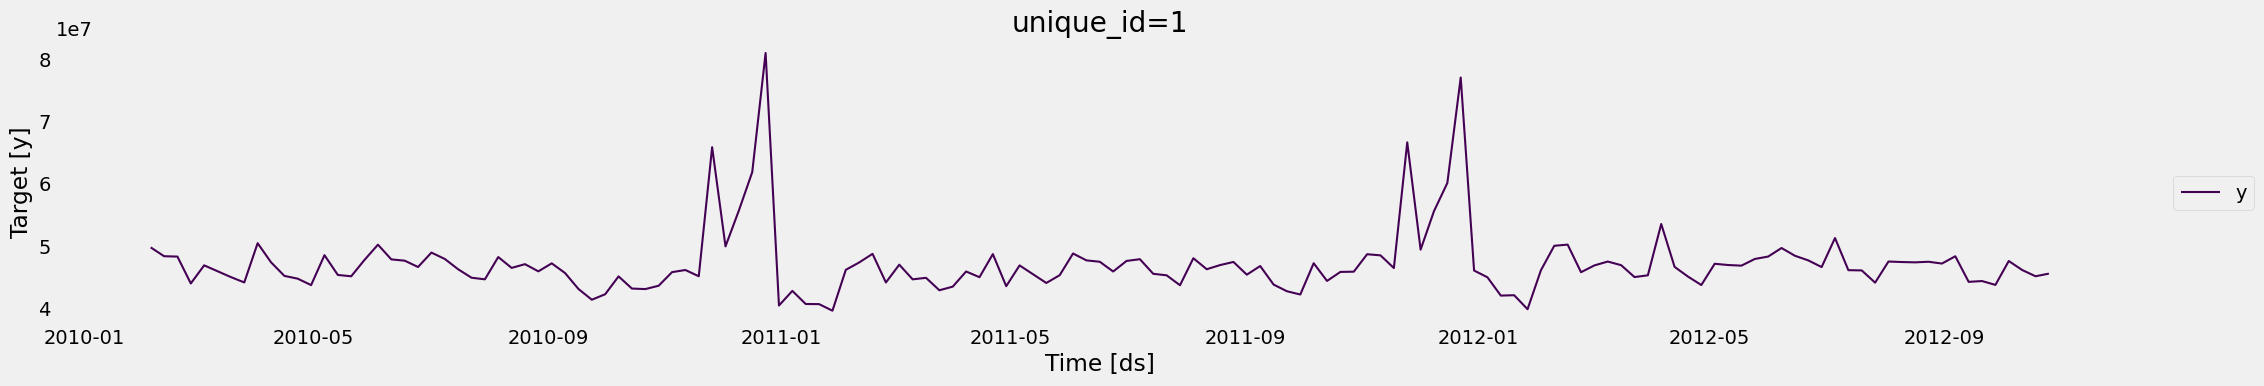

In [8]:
#StatsForecast.plot(date_sales)
plot_series(date_sales)

**Observation**: Sales is stationary in mean but unstationary in variance. Also, every year around jan , sales show a high increase (seasonal change) due to christmas and thanksgiving.

## **Correlations between other variables and sales over time**


**Assumption**: Since that all of the stores are in the united states, Therefore, there shouldn't be outliers (high changes between the temperature values or fuel prices) so in order to measure the correlation between each of these variables on sales we will use the mean of all 45 stores in each date

In [9]:
temp_mean= df.groupby('ds')['Temperature'].mean().reset_index()
temp_mean

,ds,Temperature
0,2010-02-05,34.037333
1,2010-02-12,34.151333
2,2010-02-19,37.719778
3,2010-02-26,39.243556
4,2010-03-05,42.917333
...,...,...
138,2012-09-28,68.754444
139,2012-10-05,65.973111
140,2012-10-12,58.342667
141,2012-10-19,60.705333


In [10]:
date_sales= pd.merge(temp_mean, date_sales, on='ds', how='inner')
date_sales

,ds,Temperature,y,unique_id
0,2010-02-05,34.037333,49750740.50,1
1,2010-02-12,34.151333,48336677.63,1
2,2010-02-19,37.719778,48276993.78,1
3,2010-02-26,39.243556,43968571.13,1
4,2010-03-05,42.917333,46871470.30,1
...,...,...,...,...
138,2012-09-28,68.754444,43734899.40,1
139,2012-10-05,65.973111,47566639.31,1
140,2012-10-12,58.342667,46128514.25,1
141,2012-10-19,60.705333,45122410.57,1


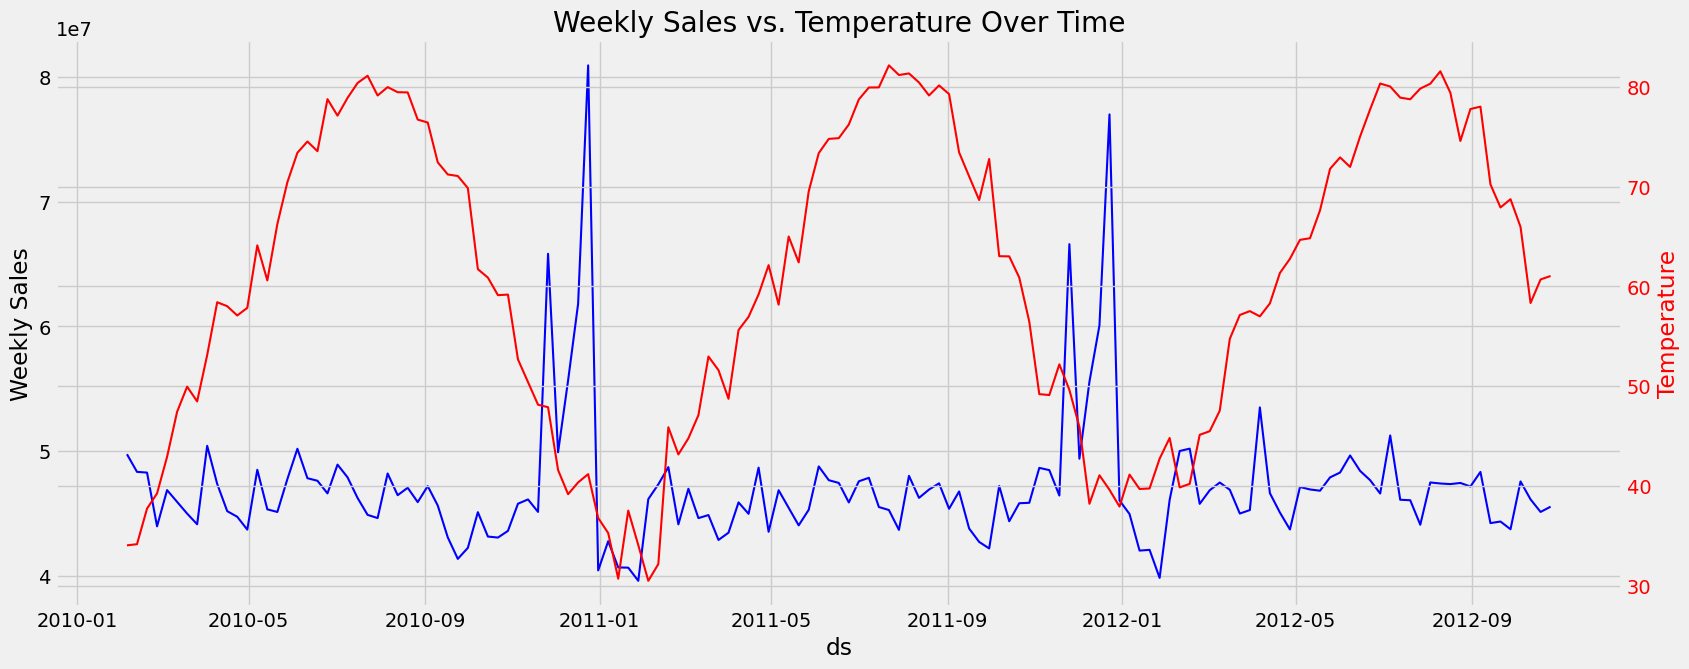

In [11]:
fig, ax1 = plt.subplots(figsize=(18, 7))

ax1.plot(date_sales['ds'], date_sales['y'], color='b', label='Weekly Sales')
ax1.set_xlabel('ds')
ax1.set_ylabel('Weekly Sales', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(date_sales['ds'], date_sales['Temperature'], color='r', label='Temperature')
ax2.set_ylabel('Temperature', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. Temperature Over Time');

**Observation**: As Temperature increase in summer sales are not as high as in winter which indicates that people go out less frequently in summer due to high temperatures

In [12]:
holiday_flag= df.groupby('ds')['Holiday_Flag'].mean().reset_index()
holiday_flag

,ds,Holiday_Flag
0,2010-02-05,0.0
1,2010-02-12,1.0
2,2010-02-19,0.0
3,2010-02-26,0.0
4,2010-03-05,0.0
...,...,...
138,2012-09-28,0.0
139,2012-10-05,0.0
140,2012-10-12,0.0
141,2012-10-19,0.0


**Observation**: Since that holidays are considered to be national holidays so they don't depend on state but they depend on the country therefore for all stores in all states holidays are the same for the same date

In [13]:
date_sales= pd.merge(holiday_flag, date_sales, on='ds', how='inner')
date_sales

,ds,Holiday_Flag,Temperature,y,unique_id
0,2010-02-05,0.0,34.037333,49750740.50,1
1,2010-02-12,1.0,34.151333,48336677.63,1
2,2010-02-19,0.0,37.719778,48276993.78,1
3,2010-02-26,0.0,39.243556,43968571.13,1
4,2010-03-05,0.0,42.917333,46871470.30,1
...,...,...,...,...,...
138,2012-09-28,0.0,68.754444,43734899.40,1
139,2012-10-05,0.0,65.973111,47566639.31,1
140,2012-10-12,0.0,58.342667,46128514.25,1
141,2012-10-19,0.0,60.705333,45122410.57,1


<Axes: xlabel='ds', ylabel='y'>

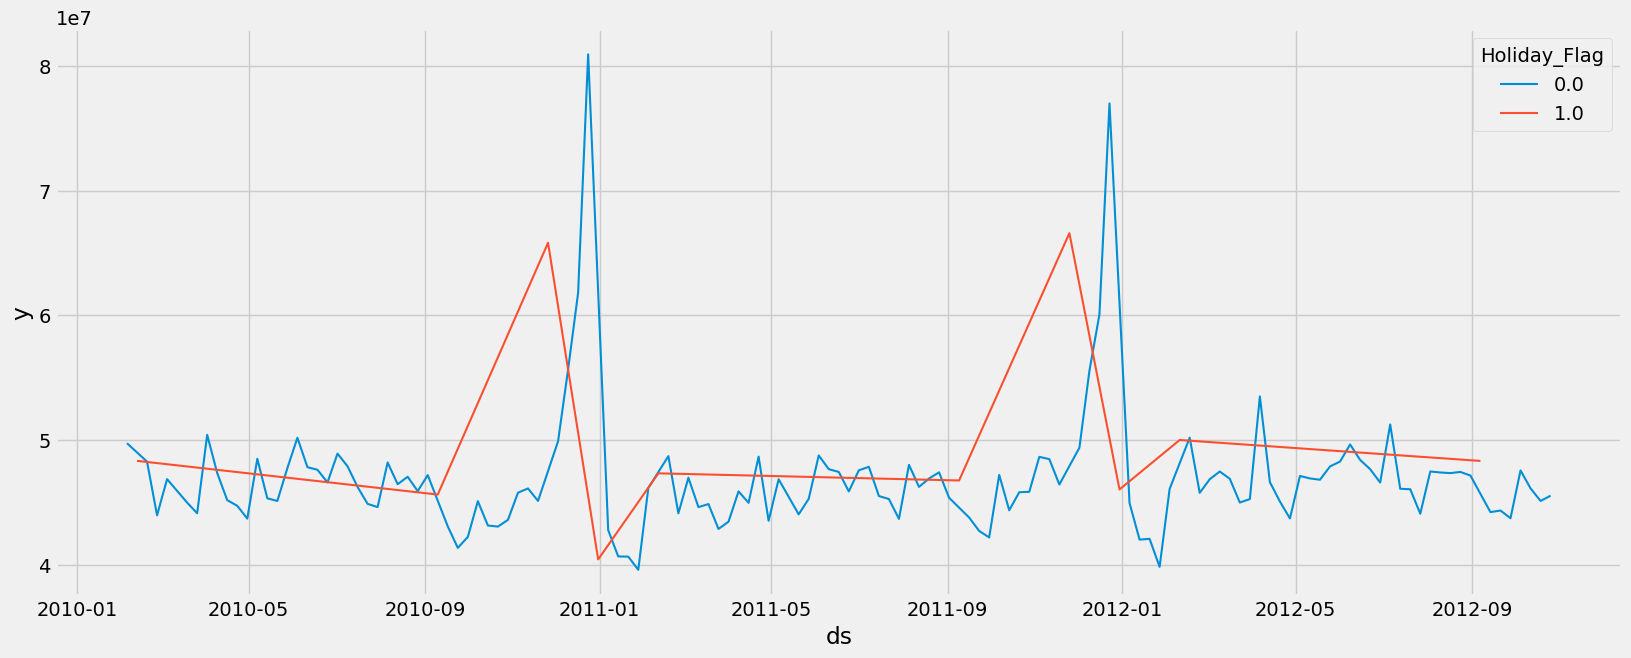

In [14]:
sns.lineplot(x=date_sales['ds'], y=date_sales['y'], hue=date_sales['Holiday_Flag'])

**Observation**: sales show greater increase (spikes) during holidays.

In [15]:
Fuel_price= df.groupby('ds')['Fuel_Price'].mean().reset_index()
Fuel_price

,ds,Fuel_Price
0,2010-02-05,2.717844
1,2010-02-12,2.694022
2,2010-02-19,2.672067
3,2010-02-26,2.683933
4,2010-03-05,2.731200
...,...,...
138,2012-09-28,3.854578
139,2012-10-05,3.845222
140,2012-10-12,3.896733
141,2012-10-19,3.880000


**Observation**: Variance values for each store are very low indicating that all stores have almost the same fuel prices

In [16]:
date_sales= pd.merge(Fuel_price, date_sales, on='ds', how='inner')
date_sales

,ds,Fuel_Price,Holiday_Flag,Temperature,y,unique_id
0,2010-02-05,2.717844,0.0,34.037333,49750740.50,1
1,2010-02-12,2.694022,1.0,34.151333,48336677.63,1
2,2010-02-19,2.672067,0.0,37.719778,48276993.78,1
3,2010-02-26,2.683933,0.0,39.243556,43968571.13,1
4,2010-03-05,2.731200,0.0,42.917333,46871470.30,1
...,...,...,...,...,...,...
138,2012-09-28,3.854578,0.0,68.754444,43734899.40,1
139,2012-10-05,3.845222,0.0,65.973111,47566639.31,1
140,2012-10-12,3.896733,0.0,58.342667,46128514.25,1
141,2012-10-19,3.880000,0.0,60.705333,45122410.57,1


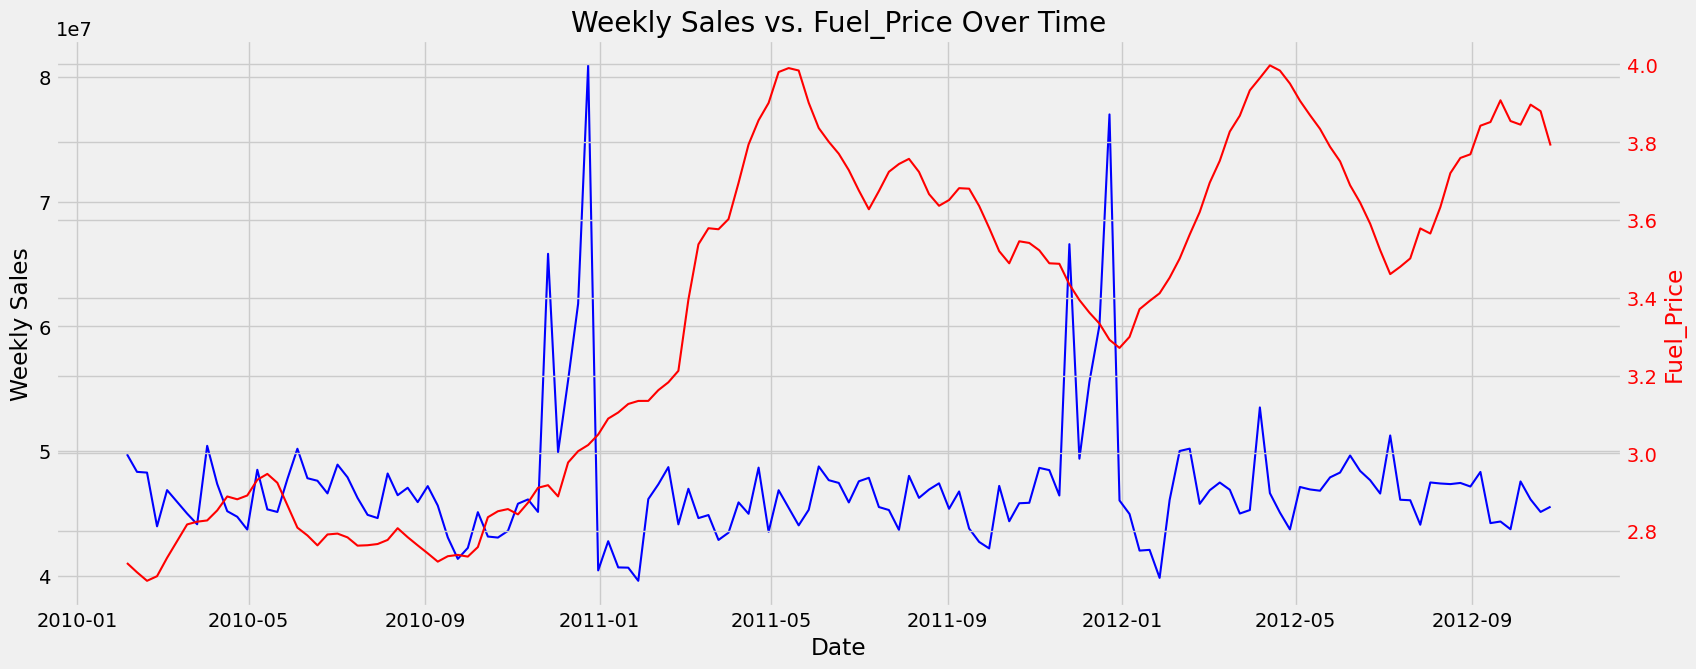

In [17]:
fig, ax1 = plt.subplots(figsize=(18, 7))

ax1.plot(date_sales['ds'], date_sales['y'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(date_sales['ds'], date_sales['Fuel_Price'], color='r', label='Fuel_Price')
ax2.set_ylabel('Fuel_Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. Fuel_Price Over Time');

**Observation**: Fuel prices seem to increase over time due to inflation but it has nothing to do with sales, i.e: it has no correlation with sales

### **Correlation between features**

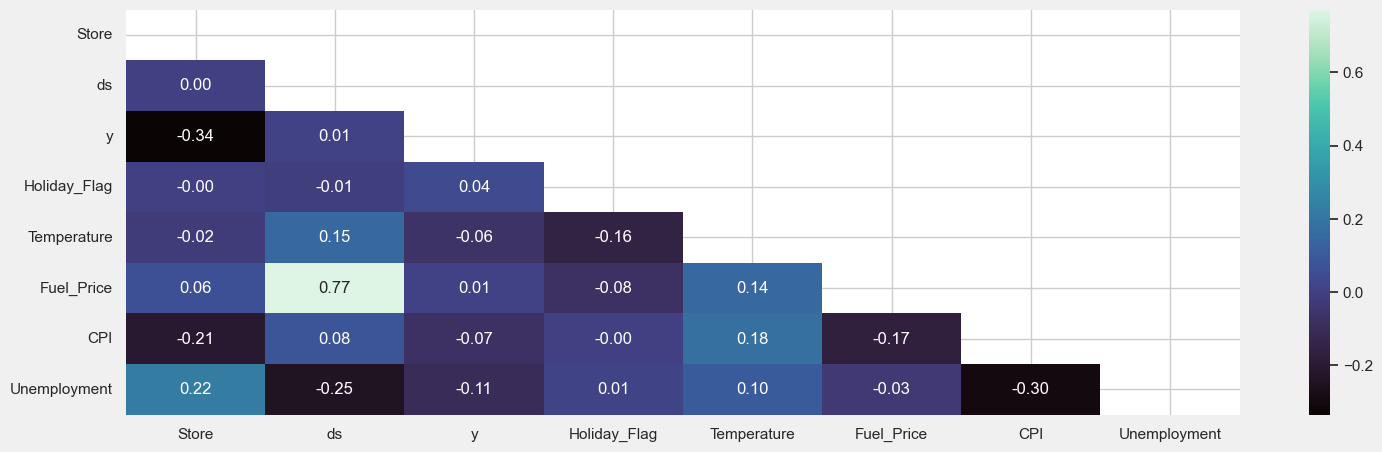

In [18]:
plt.figure(figsize=(16, 5))
sns.set(style="white") 

mask = np.triu(df.corr()) 
sns.heatmap(data=df.corr(), annot=True, fmt=".2f", cmap='mako', mask=mask)
plt.grid()
plt.show()

**Observation**: No **direct** correlation between any feature with the other based on pearson correlation values

### **Which store has maximum standard deviation i.e., the sales vary a lot.**

In [19]:
df.groupby(['Store'])['y'].std().sort_values(ascending=False).reset_index().head(15)

,Store,y
0,14,317569.949476
1,10,302262.062504
2,20,275900.562742
3,4,266201.442297
4,13,265506.995776
5,23,249788.038068
6,27,239930.135688
7,2,237683.694682
8,39,217466.454833
9,6,212525.855862


**Observation**: Store 14 has the highest standard deviation, indicating that its Weekly Sales vary significantly from week to week. While , Store 37 has the lowest standard deviation, suggesting that its Weekly Sales remain relatively stable and consistent.

<Axes: xlabel='y', ylabel='Density'>

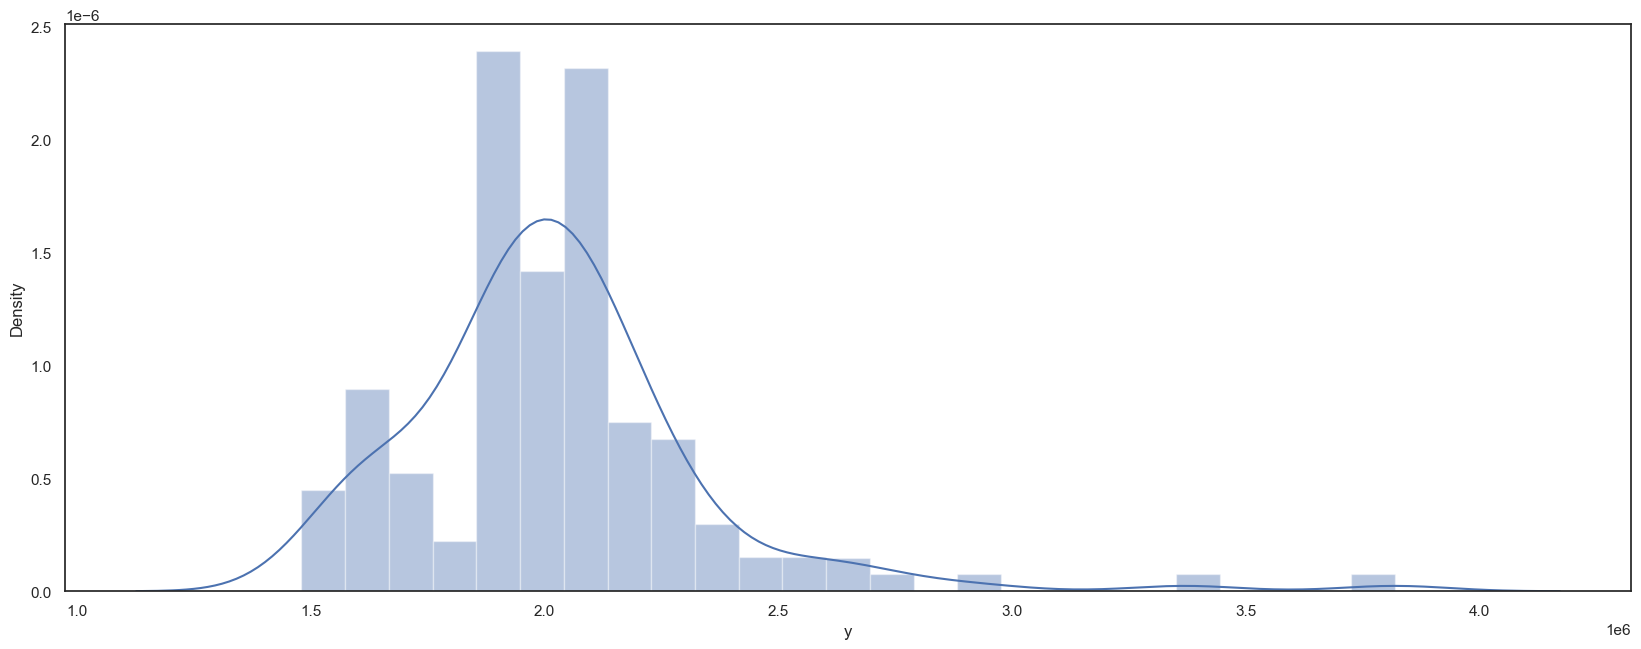

In [20]:
sns.distplot(df[df['Store'] == 14]['y'])

<Axes: xlabel='y', ylabel='Density'>

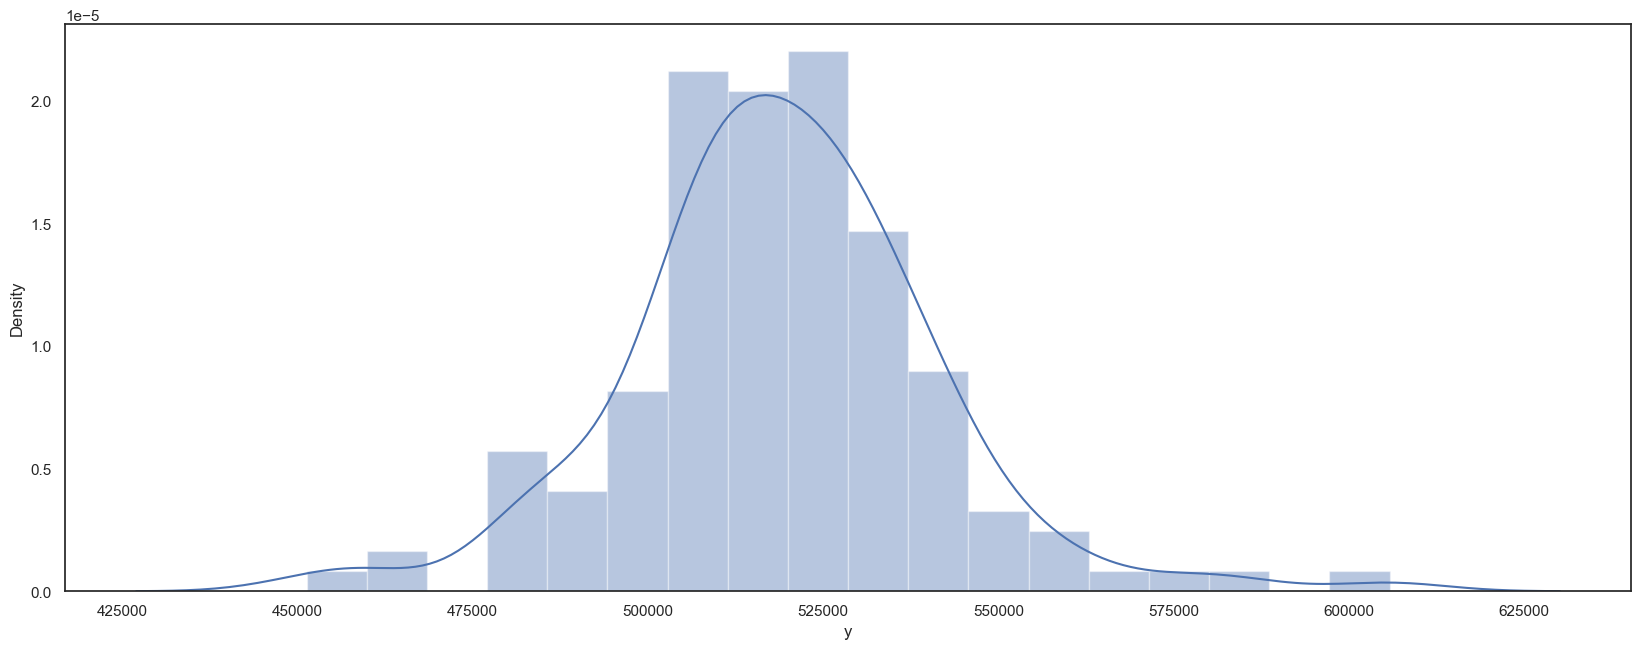

In [21]:
sns.distplot(df[df['Store'] == 37]['y'])

### **Which holidays have higher sales than the mean sales in non-holiday season for all stores together**

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

In [22]:
non_holiday_mean_sales = df[df['Holiday_Flag'] == 0]['y'].mean()
non_holiday_mean_sales

1041256.3802088555

In [23]:
super_bowl=df[(df['ds'] == '02-12-2010') | (df['ds'] == '02-12-2011') | (df['ds'] == '02-12-2012')]['y'].mean()
super_bowl

1074148.3917777783

In [24]:
Labour_day= df[(df['ds'] == '09-10-2010') | (df['ds'] == '09-10-2011') | (df['ds'] == '09-10-2012')]['y'].mean()
Labour_day

1014097.7297777778

In [25]:
Thanksgiving= df[(df['ds'] == '11-26-2010') | (df['ds'] == '11-26-2011') | (df['ds'] == '11-26-2012')]['y'].mean()
Thanksgiving

1462688.960888889

In [26]:
Christmas= df[(df['ds'] == '12-31-2010') | (df['ds'] == '12-31-2011') | (df['ds'] == '12-31-2012')]['y'].mean()
Christmas

898500.4222222222

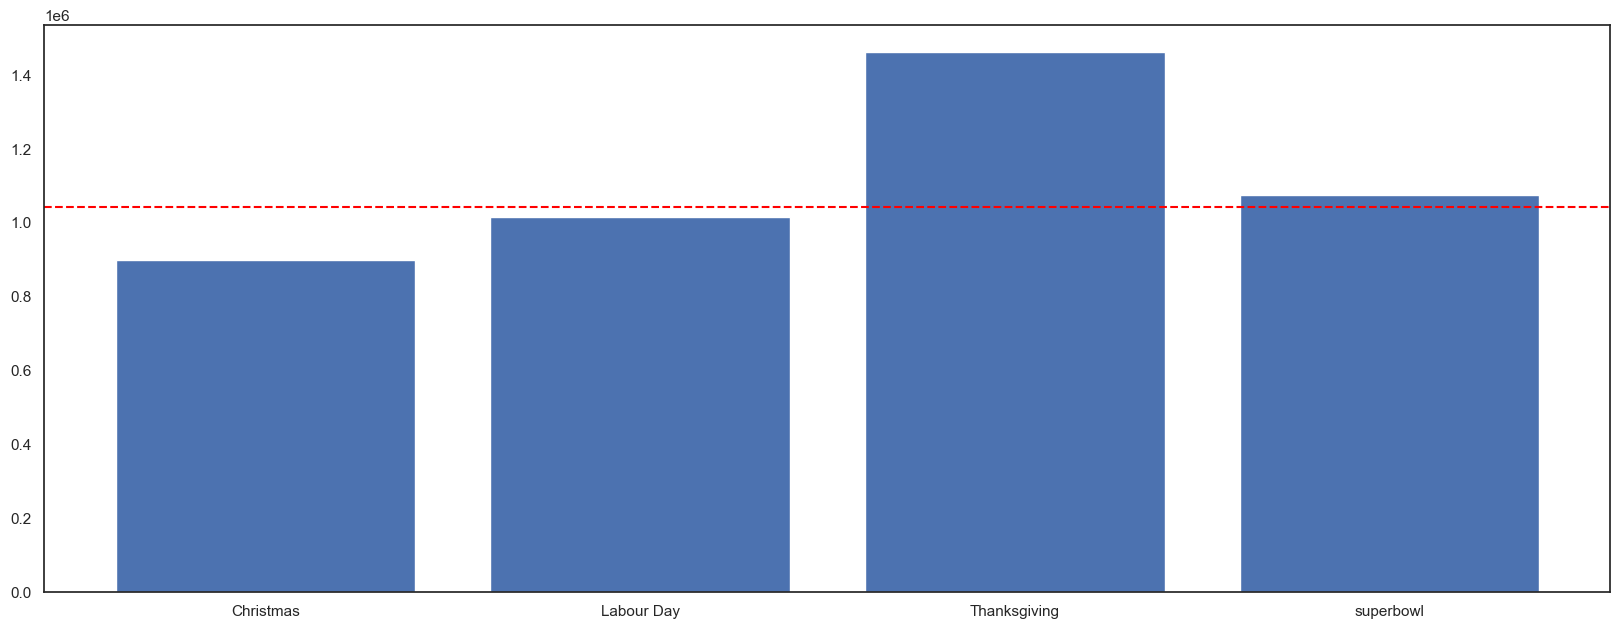

In [27]:
holidays = ['Christmas', 'Labour Day', 'Thanksgiving', 'superbowl']
mean_values = [Christmas,Labour_day,Thanksgiving,super_bowl]  # Replace these with your actual counts

plt.bar(holidays, mean_values)
plt.axhline(non_holiday_mean_sales, color='red', linestyle='--', label='Mean');

**Observation**: Thanksgiving and superbowl have the highest sales over the mean sales in non holidays

### **Sales in different months**

In [28]:
month_sales= df.groupby('ds')[['y']].sum()
month_sales

,y
ds,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


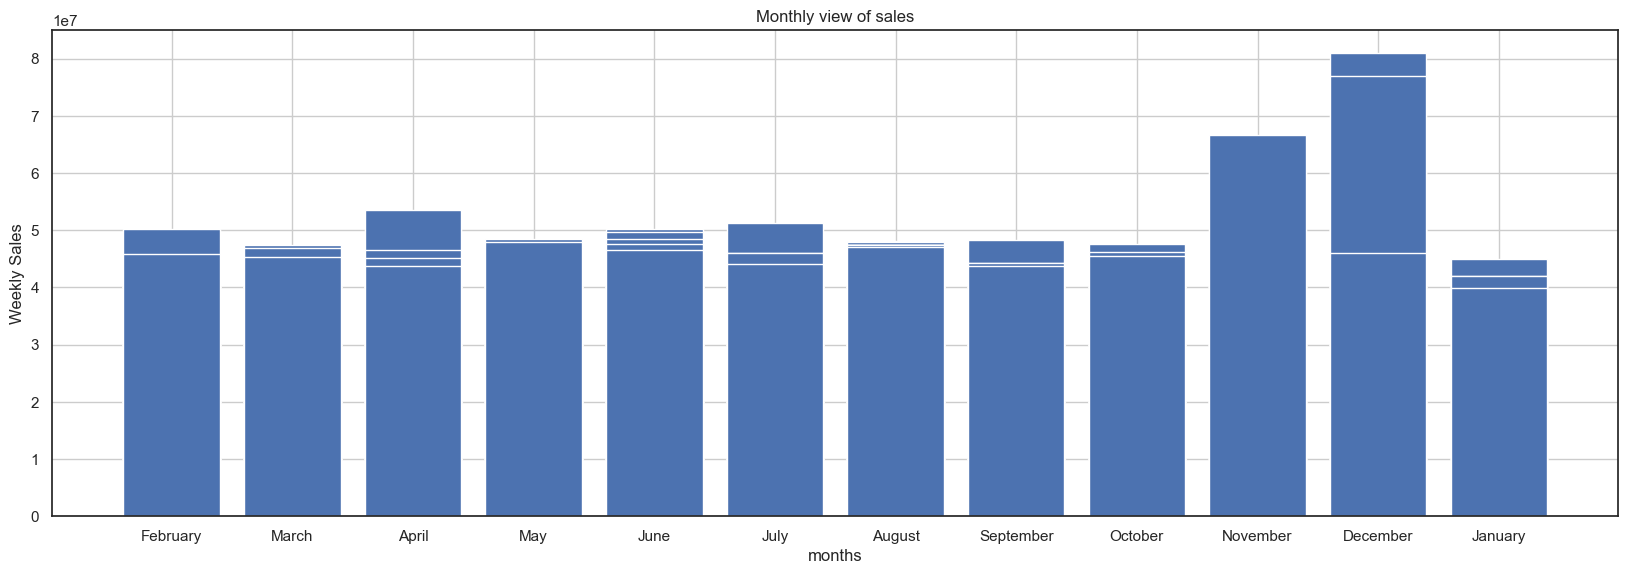

In [29]:
plt.figure(figsize=(18,6))
plt.bar(month_sales.index.month_name(),month_sales["y"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.grid()
plt.show()

**Observation**: December witnesses the highest sales over all months

### **Store-Level Analysis**

- The store with the Highest sales mean:

In [30]:
df.groupby('Store')['y'].mean().sort_values(ascending= False).reset_index().head(10)

,Store,y
0,20,2.107677e+06
1,4,2.094713e+06
2,14,2.020978e+06
3,13,2.003620e+06
4,2,1.925751e+06
5,10,1.899425e+06
6,27,1.775216e+06
7,6,1.564728e+06
8,1,1.555264e+06
9,39,1.450668e+06


**Observation**: store 20 has the highest mean of sales.

- The store with the Highest sum of sales:

In [31]:
df.groupby('Store')['y'].sum().sort_values(ascending= False).reset_index().head(15)

,Store,y
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


**Observation**: store 20 has the highest sum of sales.

- The store with the Highest max of sales:

In [32]:
df.groupby('Store')['y'].max().sort_values(ascending= False).reset_index().head(10)

,Store,y
0,14,3818686.45
1,20,3766687.43
2,10,3749057.69
3,4,3676388.98
4,13,3595903.20
5,2,3436007.68
6,27,3078162.08
7,23,2734277.10
8,6,2727575.18
9,19,2678206.42


**Observation**: store 14 has the highest max of sales

In [33]:
df[df['Store']==1].describe()['y'].reset_index()

,index,y
0,count,1.430000e+02
1,mean,1.555264e+06
2,min,1.316899e+06
3,25%,1.458105e+06
4,50%,1.534850e+06
5,75%,1.614892e+06
6,max,2.387950e+06
7,std,1.559808e+05


In [34]:
df[df['Store']==20].describe()['y'].reset_index()

,index,y
0,count,1.430000e+02
1,mean,2.107677e+06
2,min,1.761017e+06
3,25%,1.950866e+06
4,50%,2.053165e+06
5,75%,2.155186e+06
6,max,3.766687e+06
7,std,2.759006e+05


**Observation**: store number 20 is the best performing store. Therefore, we will plot it to see its behaviour against time.

In [35]:
store_sales_20= df[df['Store']==20][['ds','y']].reset_index()
store_sales_20

,index,ds,y
0,2717,2010-02-05,2401395.47
1,2718,2010-02-12,2109107.90
2,2719,2010-02-19,2161549.76
3,2720,2010-02-26,1898193.95
4,2721,2010-03-05,2119213.72
...,...,...,...
138,2855,2012-09-28,2008350.58
139,2856,2012-10-05,2246411.89
140,2857,2012-10-12,2162951.36
141,2858,2012-10-19,1999363.49


In [36]:
store_sales_not20= df[df['Store']!=20][['ds','y']]
store_sales_not20=store_sales_not20.groupby('ds')['y'].mean().reset_index()
store_sales_not20

,ds,y
0,2010-02-05,1.076121e+06
1,2010-02-12,1.050627e+06
2,2010-02-19,1.048078e+06
3,2010-02-26,9.561449e+05
4,2010-03-05,1.017097e+06
...,...,...
138,2012-09-28,9.483307e+05
139,2012-10-05,1.030005e+06
140,2012-10-12,9.992173e+05
141,2012-10-19,9.800693e+05


- Store 20 against all stores

Text(0.5, 1.0, 'Weekly Sales vs. store 20 Over Time')

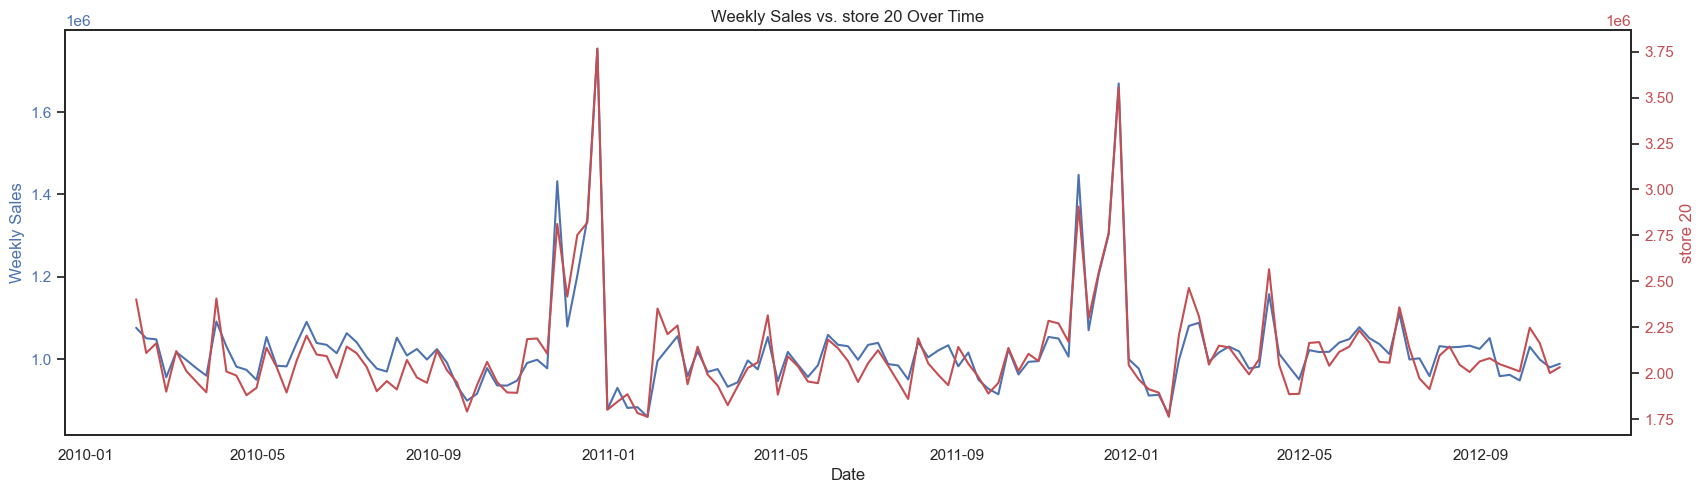

In [37]:
fig, ax1 = plt.subplots(figsize=(18, 5))

ax1.plot(store_sales_not20['ds'], store_sales_not20['y'], color='b', label='all stores Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(store_sales_20['ds'], store_sales_20['y'], color='r', label='store 20')
ax2.set_ylabel('store 20', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. store 20 Over Time')

**Observation**: it is obvious that store 20 has higher peaks in sales than the rest of stores which means that it is the top performing store

### **How do Consumer Price Index (CPI) and unemployment rate correlate with sales?**

**What is CPI?**:

The Consumer Price Index (CPI) is a measure that examines the average change in prices paid by consumers for a basket of goods and services over time. It is one of the most widely used indicators for inflation.

In [38]:
df.groupby('ds')['CPI'].std()

ds
2010-02-05    38.692144
2010-02-12    38.732430
2010-02-19    38.737027
2010-02-26    38.735680
2010-03-05    38.734337
                ...    
2012-09-28    41.517399
2012-10-05    41.588349
2012-10-12    41.659314
2012-10-19    41.688018
2012-10-26    41.709751
Name: CPI, Length: 143, dtype: float64

In [39]:
CPI= df.groupby('ds')['CPI'].mean().reset_index()
CPI

,ds,CPI
0,2010-02-05,167.730885
1,2010-02-12,167.825608
2,2010-02-19,167.871686
3,2010-02-26,167.909657
4,2010-03-05,167.947628
...,...,...
138,2012-09-28,176.373588
139,2012-10-05,176.505052
140,2012-10-12,176.636515
141,2012-10-19,176.652613


In [40]:
date_sales= pd.merge(CPI, date_sales, on='ds', how='inner')
date_sales

,ds,CPI,Fuel_Price,Holiday_Flag,Temperature,y,unique_id
0,2010-02-05,167.730885,2.717844,0.0,34.037333,49750740.50,1
1,2010-02-12,167.825608,2.694022,1.0,34.151333,48336677.63,1
2,2010-02-19,167.871686,2.672067,0.0,37.719778,48276993.78,1
3,2010-02-26,167.909657,2.683933,0.0,39.243556,43968571.13,1
4,2010-03-05,167.947628,2.731200,0.0,42.917333,46871470.30,1
...,...,...,...,...,...,...,...
138,2012-09-28,176.373588,3.854578,0.0,68.754444,43734899.40,1
139,2012-10-05,176.505052,3.845222,0.0,65.973111,47566639.31,1
140,2012-10-12,176.636515,3.896733,0.0,58.342667,46128514.25,1
141,2012-10-19,176.652613,3.880000,0.0,60.705333,45122410.57,1


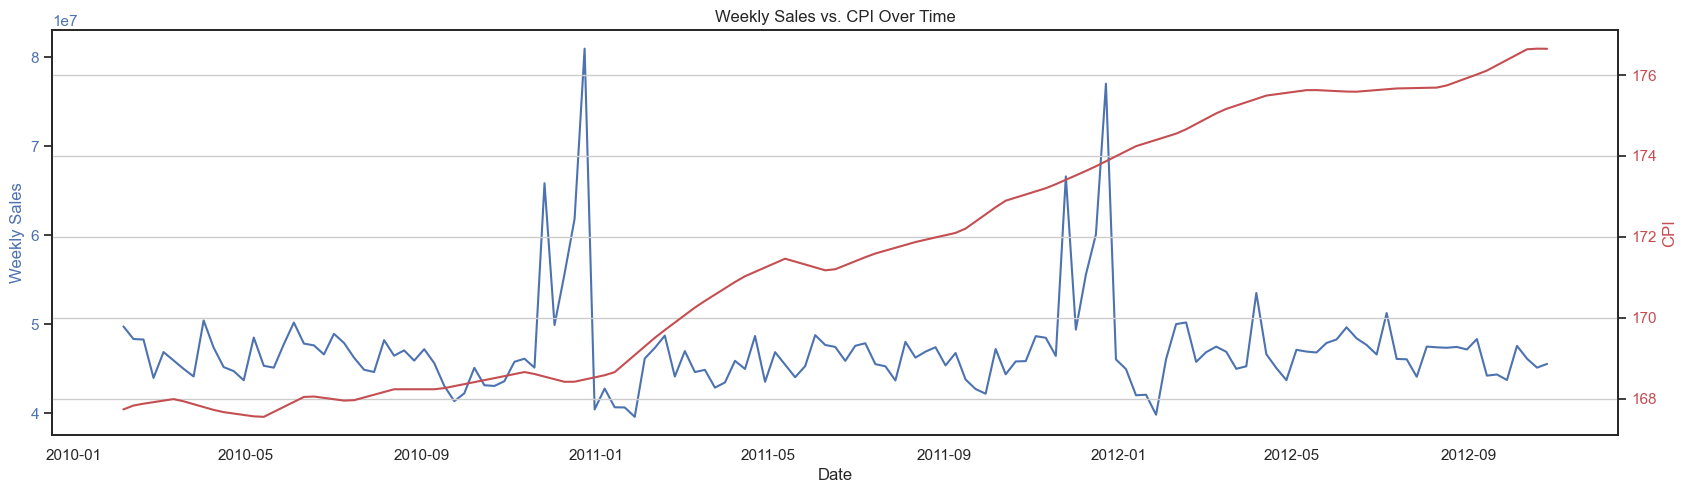

In [41]:
fig, ax1 = plt.subplots(figsize=(18, 5))

ax1.plot(date_sales['ds'], date_sales['y'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['ds'], date_sales['CPI'], color='r', label='CPI')
ax2.set_ylabel('CPI', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. CPI Over Time');
plt.grid()
plt.show()

**Observation**: since CPI mainly indicates inflation, it has no direct correlation with sales overtime.

In [42]:
Unemployment= df.groupby('ds')['Unemployment'].mean().reset_index()
Unemployment

,ds,Unemployment
0,2010-02-05,8.619311
1,2010-02-12,8.619311
2,2010-02-19,8.619311
3,2010-02-26,8.619311
4,2010-03-05,8.619311
...,...,...
138,2012-09-28,7.237333
139,2012-10-05,6.953711
140,2012-10-12,6.953711
141,2012-10-19,6.953711


In [43]:
date_sales= pd.merge(Unemployment, date_sales, on='ds', how='inner')
date_sales

,ds,Unemployment,CPI,Fuel_Price,Holiday_Flag,Temperature,y,unique_id
0,2010-02-05,8.619311,167.730885,2.717844,0.0,34.037333,49750740.50,1
1,2010-02-12,8.619311,167.825608,2.694022,1.0,34.151333,48336677.63,1
2,2010-02-19,8.619311,167.871686,2.672067,0.0,37.719778,48276993.78,1
3,2010-02-26,8.619311,167.909657,2.683933,0.0,39.243556,43968571.13,1
4,2010-03-05,8.619311,167.947628,2.731200,0.0,42.917333,46871470.30,1
...,...,...,...,...,...,...,...,...
138,2012-09-28,7.237333,176.373588,3.854578,0.0,68.754444,43734899.40,1
139,2012-10-05,6.953711,176.505052,3.845222,0.0,65.973111,47566639.31,1
140,2012-10-12,6.953711,176.636515,3.896733,0.0,58.342667,46128514.25,1
141,2012-10-19,6.953711,176.652613,3.880000,0.0,60.705333,45122410.57,1


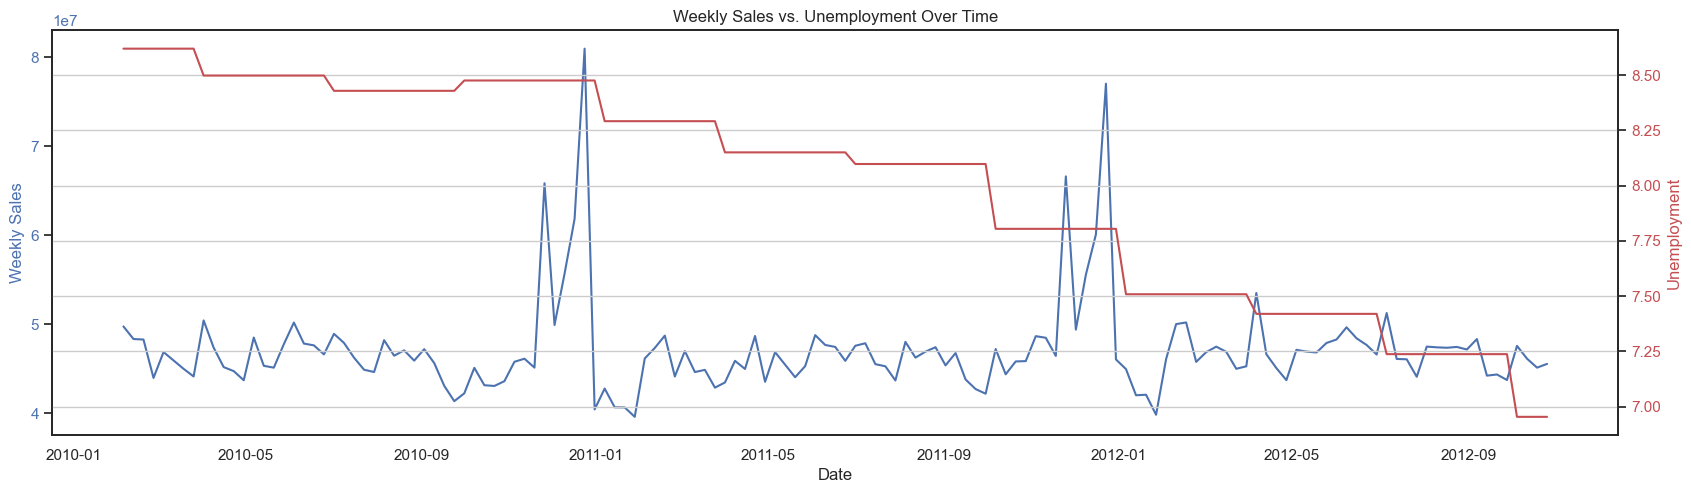

In [44]:
fig, ax1 = plt.subplots(figsize=(18, 5))

ax1.plot(date_sales['ds'], date_sales['y'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['ds'], date_sales['Unemployment'], color='r', label='Unemployment')
ax2.set_ylabel('Unemployment', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. Unemployment Over Time')
plt.grid()
plt.show()

**Observation**: unemployement doesn't affect sales. however it decreases considerably over time

# **Split the data into training and testing** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 8 weeks.

In [45]:
data=date_sales[["ds","y","unique_id"]]

In [46]:
train = data[data.ds<='2012-08-31'] 
test=data[(data['ds'] > '2012-08-31')]

train.shape, test.shape

((135, 3), (8, 3))

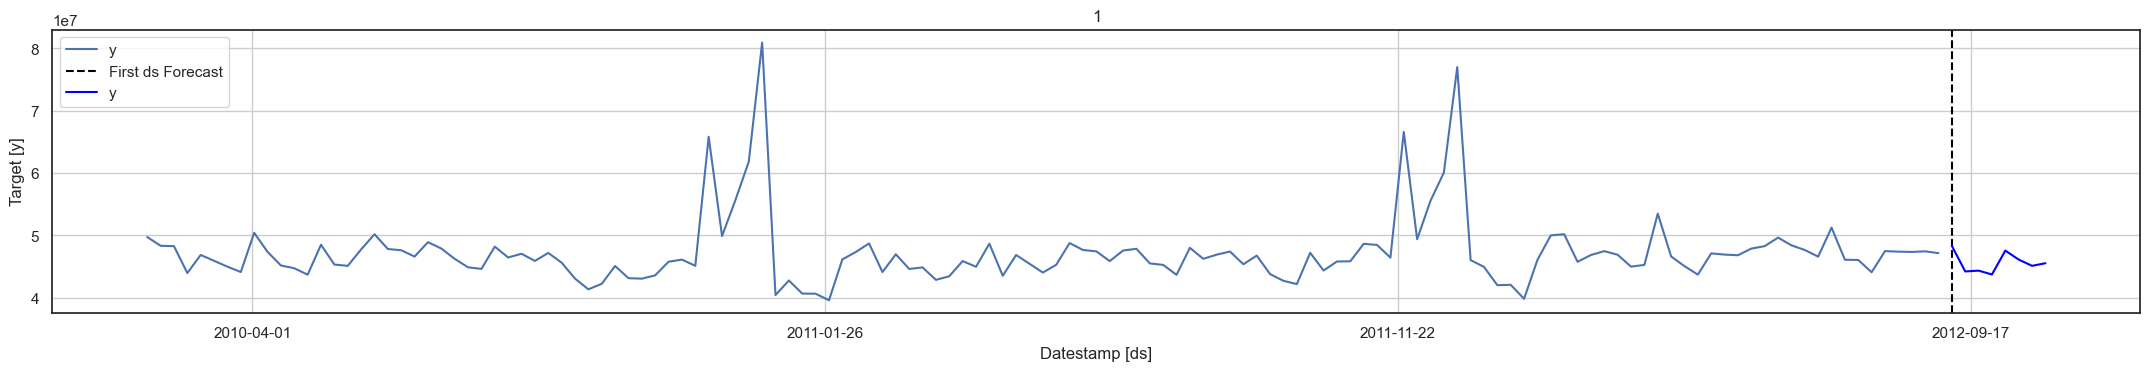

In [47]:
StatsForecast.plot(train, test)

# **Implementation with StatsForecast** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

We are going to train the `Seasonal Exponential Smoothing Optimized` model, using the `SeasonalExponentialSmoothingOptimized` function. This model will help us forecast user demand in the next 12 month.

In [48]:
from statsforecast import StatsForecast
from statsforecast.models import  AutoARIMA, AutoCES,AutoTheta, SeasonalNaive, MSTL

In [49]:
season_length = 52 # weekly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          AutoCES(season_length=season_length),
          AutoTheta(season_length=season_length),
          SeasonalNaive(season_length=season_length),
          MSTL(
    season_length=[52], # seasonalities of the time series 
    trend_forecaster=AutoARIMA() # model used to forecast trend
)]

In [50]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='W', 
    n_jobs=-1)

## **Fit the Model**

In [51]:
sf.fit()

StatsForecast(models=[AutoARIMA,CES,AutoTheta,SeasonalNaive,MSTL])

## **Predict Method**

In [52]:
from datetime import timedelta
Y_hat = sf.predict(horizon)
Y_hat["ds"]=Y_hat["ds"]+timedelta(days=5)
Y_hat

,ds,AutoARIMA,CES,AutoTheta,SeasonalNaive,MSTL
unique_id,,,,,,
1,2012-09-07,47863584.0,46994764.0,47030348.0,46763228.0,48389344.0
1,2012-09-14,44801964.0,44222752.0,44206904.0,43793960.0,45063060.0
1,2012-09-21,43713608.0,42822804.0,42772580.0,42718096.0,43870596.0
1,2012-09-28,43189652.0,42999648.0,42980084.0,42195832.0,43372232.0
1,2012-10-05,48205280.0,46954516.0,46982724.0,47211688.0,48406568.0
1,2012-10-12,45368384.0,44534236.0,44516032.0,44374820.0,45546384.0
1,2012-10-19,46812512.0,45219384.0,45197616.0,45818952.0,46950136.0
1,2012-10-26,46849380.0,45494280.0,45492732.0,45855820.0,46950916.0


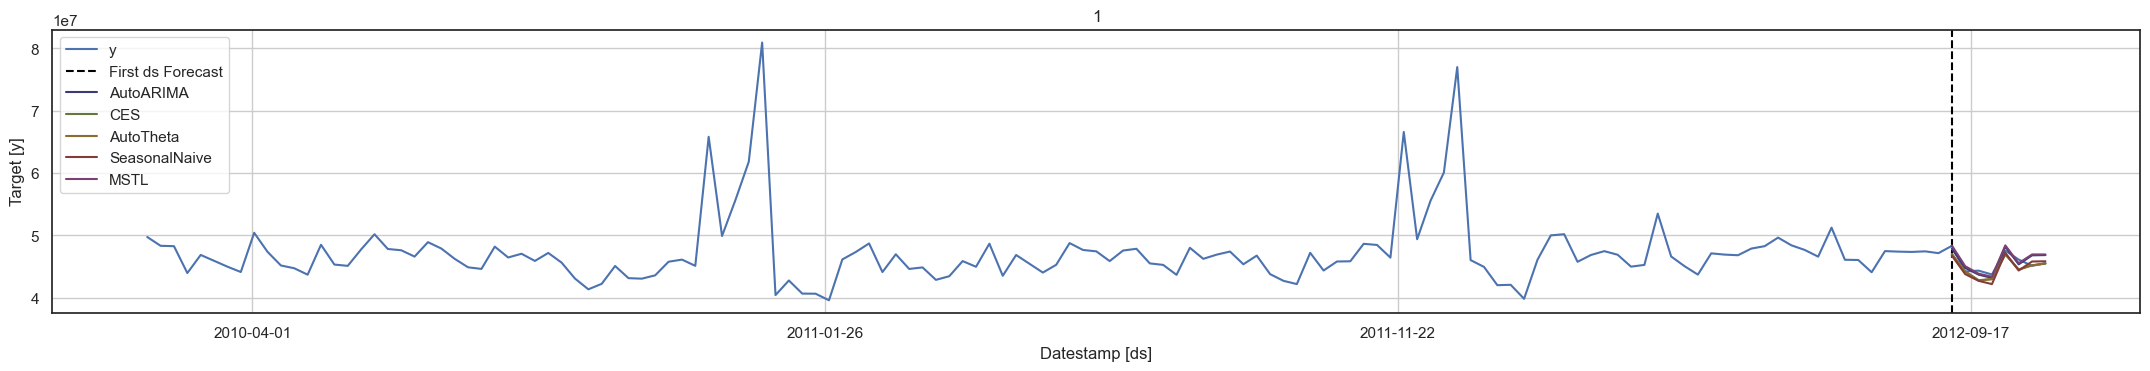

In [53]:
sf.plot(data, Y_hat, )

# **Evaluate the model** <a id="6"></a> 

[Table of Contents](#0.1)

In [54]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [55]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [56]:
evaluate_performace(train, test,Y_hat.reset_index() , models=["AutoARIMA","CES","AutoTheta","MSTL", "SeasonalNaive"])

,mase,mae,mape,rmse,smape
AutoARIMA,0.164107,8.278404e+05,1.820146,9.221716e+05,1.808894
CES,0.147655,7.448485e+05,1.621530,9.745615e+05,1.644351
AutoTheta,0.148146,7.473270e+05,1.628466,9.817926e+05,1.651733
MSTL,0.158576,7.999386e+05,1.762855,9.639682e+05,1.744954
SeasonalNaive,0.205454,1.036415e+06,2.275441,1.197503e+06,2.307051


# **Exogenous variables**<a class="anchor" id="7"></a>

[Table of Contents](#0.1)

We are going to select the exogenous variables that will enter our model, for this it is necessary to have two sets of data:

1. The training data: this data will contain all the exogenous variables that we are going to add to our model plus the target variables.
2. Data with exogenous variables: we select the variables that we want to add to our model, but this data set does not contain the target variable.

Let's load the data... and see!!!

In [57]:
df1=date_sales[["ds","y", "Holiday_Flag","unique_id", "CPI"]]
df1

,ds,y,Holiday_Flag,unique_id,CPI
0,2010-02-05,49750740.50,0.0,1,167.730885
1,2010-02-12,48336677.63,1.0,1,167.825608
2,2010-02-19,48276993.78,0.0,1,167.871686
3,2010-02-26,43968571.13,0.0,1,167.909657
4,2010-03-05,46871470.30,0.0,1,167.947628
...,...,...,...,...,...
138,2012-09-28,43734899.40,0.0,1,176.373588
139,2012-10-05,47566639.31,0.0,1,176.505052
140,2012-10-12,46128514.25,0.0,1,176.636515
141,2012-10-19,45122410.57,0.0,1,176.652613


In [58]:
exogen=date_sales[["ds","Holiday_Flag","unique_id", "CPI"]]

# **Splitting training and test data with exogenous variables** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 8 weekly to test and evaluate the performance of our model.

In [59]:
train_exo = df1[df1.ds<='2012-08-31'] 
test_exo=exogen[(exogen['ds'] > '2012-08-31')]

train_exo.shape, test_exo.shape

((135, 5), (8, 4))

# **Implementation of StatsForecast with exogenous variables** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

In [60]:
season_length = 52 # weekly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models_exo = [AutoARIMA(season_length=season_length),
          AutoCES(season_length=season_length),
          AutoTheta(season_length=season_length),
          SeasonalNaive(season_length=season_length),
          MSTL(
    season_length=[52], # seasonalities of the time series 
    trend_forecaster=AutoARIMA() # model used to forecast trend
)]

In [61]:
# Instantiate StatsForecast class as sf
sf_exo = StatsForecast(
    models=models_exo,
    freq='W', 
    n_jobs=-1)

## **Fit model with exogenous variables**

The fit method has two parameters:

* Training data with exogenous variables.
* Data with only exogenous variables.

In [62]:
sf_exo.fit(train_exo,test_exo)

StatsForecast(models=[AutoARIMA,CES,AutoTheta,SeasonalNaive,MSTL])

## **Predict Method**

The predict method takes only 2 parameters

* The Horizon: amount of data you want to predict.
* Exogenous variables without the target variable.

In [63]:
Y_hat_exo=sf_exo.predict(h=horizon,  X_df=test_exo) 
Y_hat_exo["ds"]=Y_hat_exo["ds"]+timedelta(days=5)
Y_hat_exo

,ds,AutoARIMA,CES,AutoTheta,SeasonalNaive,MSTL
unique_id,,,,,,
1,2012-09-07,47635888.0,46994764.0,47030348.0,46763228.0,48423364.0
1,2012-09-14,44458116.0,44222752.0,44206904.0,43793960.0,45088400.0
1,2012-09-21,43328688.0,42822804.0,42772580.0,42718096.0,43910388.0
1,2012-09-28,42789012.0,42999648.0,42980084.0,42195832.0,43427148.0
1,2012-10-05,47795624.0,46954516.0,46982724.0,47211688.0,48478004.0
1,2012-10-12,44953536.0,44534236.0,44516032.0,44374820.0,45634476.0
1,2012-10-19,46388128.0,45219384.0,45197616.0,45818952.0,47040284.0
1,2012-10-26,46412576.0,45494280.0,45492732.0,45855820.0,47040468.0


In [64]:
actual_exo=date_sales[date_sales.ds>'2012-08-31'] 
actual_exo

,ds,Unemployment,CPI,Fuel_Price,Holiday_Flag,Temperature,y,unique_id
135,2012-09-07,7.237333,176.014468,3.842556,1.0,78.038667,48330059.31,1
136,2012-09-14,7.237333,176.110660,3.852044,0.0,70.238222,44226038.65,1
137,2012-09-21,7.237333,176.242124,3.907911,0.0,67.924889,44354547.11,1
138,2012-09-28,7.237333,176.373588,3.854578,0.0,68.754444,43734899.40,1
139,2012-10-05,6.953711,176.505052,3.845222,0.0,65.973111,47566639.31,1
140,2012-10-12,6.953711,176.636515,3.896733,0.0,58.342667,46128514.25,1
141,2012-10-19,6.953711,176.652613,3.880000,0.0,60.705333,45122410.57,1
142,2012-10-26,6.953711,176.649482,3.791489,0.0,61.051111,45544116.29,1


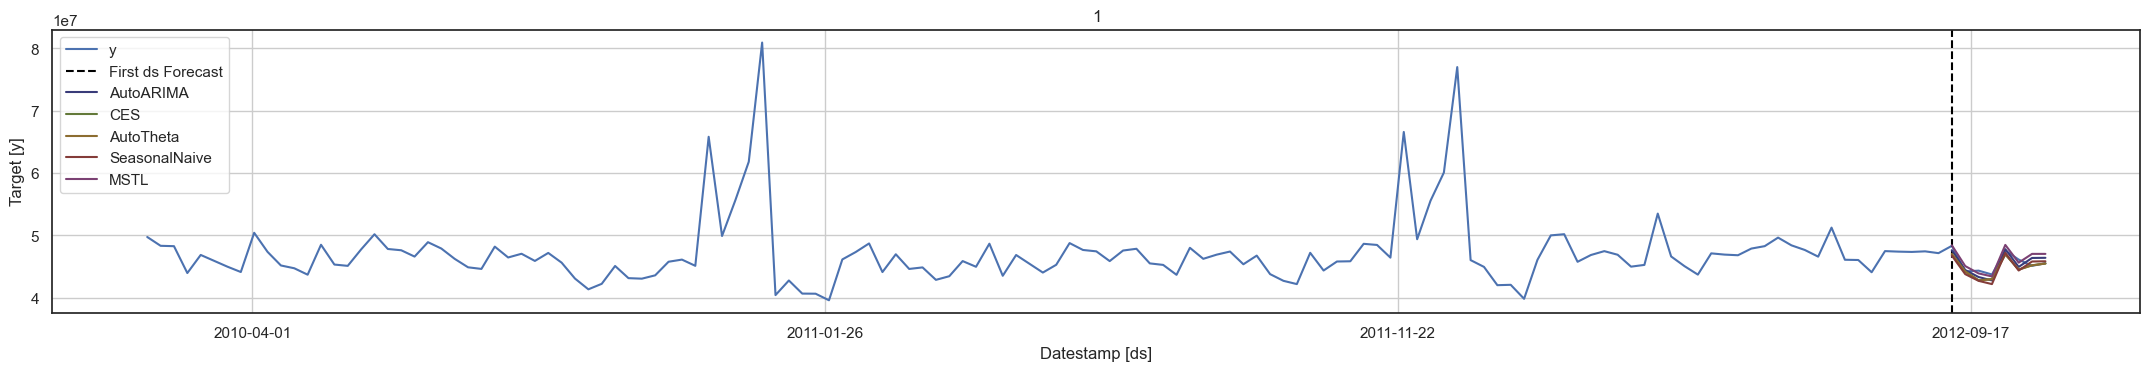

In [65]:
sf.plot(date_sales, Y_hat_exo)

# **Evaluate the model for exogenous variables** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [66]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [73]:
print("No exogenous variables")
print(evaluate_performace(train, test,Y_hat.reset_index() , models=["AutoARIMA","CES","AutoTheta","MSTL", "SeasonalNaive"]))
print("====="*15)
print("with exogenous variables")
print(evaluate_performace(train_exo, actual_exo,Y_hat_exo.reset_index() , models=["AutoARIMA","CES","AutoTheta","MSTL", "SeasonalNaive"]))

No exogenous variables
                   mase           mae      mape          rmse     smape
AutoARIMA      0.164107  8.278404e+05  1.820146  9.221716e+05  1.808894
CES            0.147655  7.448485e+05  1.621530  9.745615e+05  1.644351
AutoTheta      0.148146  7.473270e+05  1.628466  9.817926e+05  1.651733
MSTL           0.158576  7.999386e+05  1.762855  9.639682e+05  1.744954
SeasonalNaive  0.205454  1.036415e+06  2.275441  1.197503e+06  2.307051
with exogenous variables
                   mase           mae      mape          rmse     smape
AutoARIMA      0.159483  8.045169e+05  1.772152  8.854444e+05  1.776479
CES            0.147655  7.448485e+05  1.621530  9.745615e+05  1.644351
AutoTheta      0.148146  7.473270e+05  1.628466  9.817926e+05  1.651733
MSTL           0.161740  8.159006e+05  1.796358  1.002268e+06  1.775677
SeasonalNaive  0.205454  1.036415e+06  2.275441  1.197503e+06  2.307051


# **Conclusion** <a id="7"></a> 

El análisis presenta los resultados de diferentes modelos utilizados para predecir las ventas de Walmart. Se proporcionan medidas de evaluación para cada modelo, como MASE, MAE, MAPE, RMSE y SMAPE. También se muestra una comparación entre los modelos que utilizan variables exógenas y los que no las utilizan.

En términos generales, se observa que los modelos AutoARIMA, CES, AutoTheta y MSTL tienen resultados similares tanto en los casos sin variables exógenas como en los casos con variables exógenas. Estos modelos tienen valores de MASE relativamente bajos, lo que indica que sus predicciones son precisas en comparación con un modelo de referencia ingenuo que simplemente predice el valor anterior.

El modelo SeasonalNaive muestra los peores resultados en ambos escenarios, con valores más altos en todas las medidas de evaluación. Esto sugiere que este modelo no es tan efectivo para predecir las ventas de Walmart en comparación con los otros modelos evaluados.

En cuanto a la diferencia entre los modelos que utilizan variables exógenas y los que no las utilizan, se puede observar que los modelos AutoARIMA, CES y AutoTheta tienen resultados casi idénticos en ambos escenarios. Esto indica que la inclusión de variables exógenas no mejora significativamente el rendimiento de estos modelos en términos de precisión de predicción.

Por otro lado, el modelo MSTL muestra un empeoramiento en sus resultados cuando se utilizan variables exógenas. El valor de MASE aumenta y el RMSE también es más alto en comparación con el escenario sin variables exógenas. Esto sugiere que la inclusión de variables exógenas puede introducir ruido o complejidad adicional en el modelo MSTL, lo que afecta negativamente su capacidad predictiva.

En resumen, los modelos AutoARIMA, CES y AutoTheta muestran un buen desempeño en la predicción de las ventas de Walmart, tanto con variables exógenas como sin ellas. El modelo MSTL muestra resultados competitivos sin variables exógenas, pero su desempeño se ve afectado negativamente al incluir variables exógenas. El modelo SeasonalNaive tiene el peor desempeño en ambos casos.

<a id="8"></a>
# **References**

1. [Arima Model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)
2. [Automatic Forecasting](https://nixtla.github.io/statsforecast/src/core/models.html)
4. [Panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
5. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”](https://otexts.com/fpp3/tscv.html)